In [1]:
from functools import reduce
from itertools import cycle
from operator import mul
from matplotlib.ticker import MaxNLocator
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
%load_ext autoreload
%autoreload 2
from util import split_agents, compute_pairwise_distance

In [2]:
import dpilqr
import util

#### 3-D trajectory of regular ADMM

In [3]:
import matplotlib.font_manager

In [4]:
trajectory_data = np.load("ADMM_BVC_convex_5.npz")

In [5]:
trajectory_data

NpzFile 'ADMM_BVC_convex_5.npz' with keys: X_full, obj_trj, xr

In [6]:
X_full = trajectory_data['X_full']
xr = trajectory_data['xr']
obj_trj = trajectory_data['obj_trj']

In [7]:
X_full[-1]

array([-7.834e-01, -1.767e-01,  1.123e+00, -9.152e-04, -2.417e-03,
       -7.191e-02,  6.700e-01,  3.201e-02,  1.071e+00,  1.538e-01,
        3.068e-02, -3.699e-02,  3.365e-01, -1.570e-01,  1.412e+00,
        3.394e-02,  2.863e-02, -4.442e-02,  6.916e-01, -3.525e-01,
        1.140e+00, -9.373e-03, -1.305e-01,  2.777e-02, -8.830e-01,
        6.822e-01,  1.229e+00, -2.131e-01,  5.338e-03, -3.448e-02])

In [8]:
xr.T

array([[-0.786, -0.18 ,  1.114,  0.   ,  0.   ,  0.   ,  0.715,  0.033,
         1.08 ,  0.   ,  0.   ,  0.   ,  0.334, -0.155,  1.4  ,  0.   ,
         0.   ,  0.   ,  0.696, -0.386,  1.155,  0.   ,  0.   ,  0.   ,
        -0.959,  0.688,  1.232,  0.   ,  0.   ,  0.   ]])

In [9]:
dpilqr.distance_to_goal(X_full[-1].flatten(), xr.flatten(), 5, 6, 3)

array([0.011, 0.046, 0.013, 0.037, 0.077])

In [10]:
obj_trj

array(501.67)

In [11]:
x_dims = [6,6,6,6,6]

/home/randychen233/projects/ICON_lab/dp-ilqr/dpilqr/graphics.py:130: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(Xi[:, 0], Xi[:, 1], Xi[:, 2], c=c, lw=2)


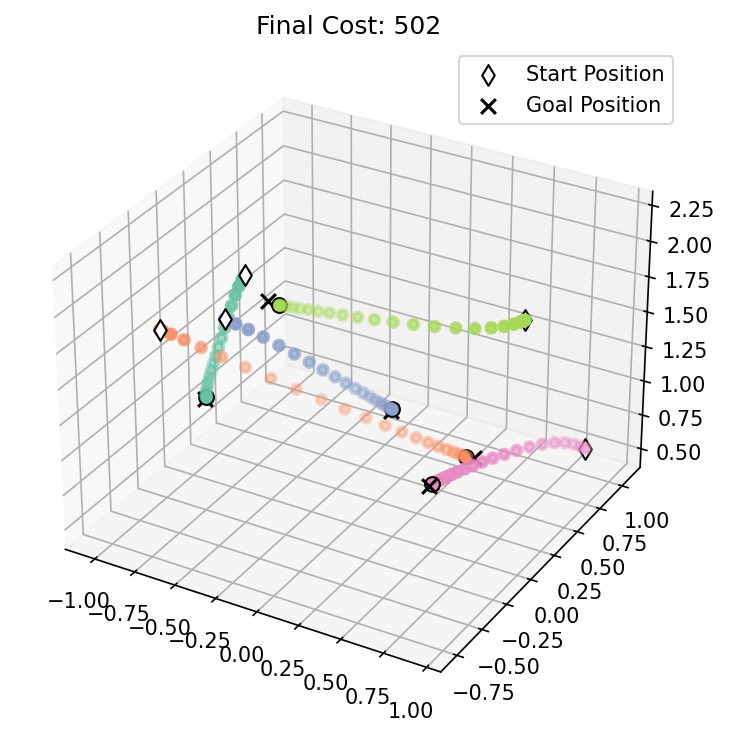

In [20]:
plt.figure(dpi=150)
dpilqr.plot_solve(X_full, float(obj_trj), xr, x_dims, True, 3)
plt.savefig('figures/BVC_5_drones', bbox_inches='tight', dpi=300)
plt.legend(plt.gca().get_children()[1:3], ["Start Position", "Goal Position"])
# plt.show()

In [13]:
compute_pairwise_distance(X_full,x_dims).min(),compute_pairwise_distance(X_full,x_dims).max()

(0.2846737946086973, 2.5941658597140673)

In [14]:
compute_pairwise_distance(X_full,x_dims).shape

(22, 10)

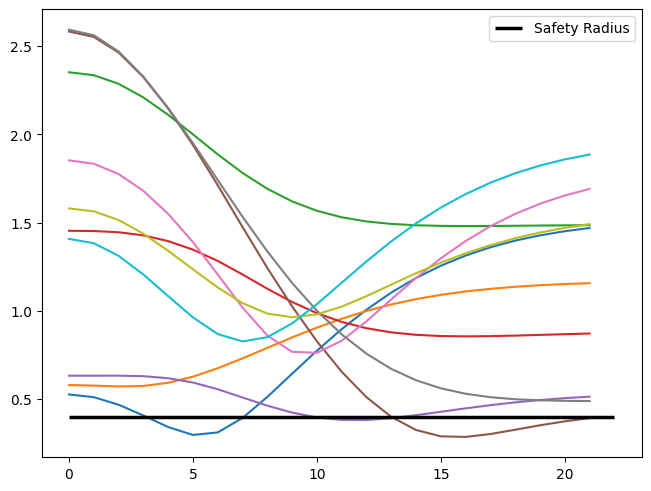

In [15]:
plt.figure(dpi=100)
plt.plot(compute_pairwise_distance(X_full,x_dims))
plt.hlines(0.4, 0, X_full.shape[0] ,color='k',linewidth=2.5,label='Safety Radius')
plt.legend()